Part 3 - Time Series Data

Question 24: Define strict and weak stationarity.

Stationarity of a time series means that the statistical properties of that time series are constant, so: mean, variance, autocovariance... are all constant over time. Now, there are two types of stationarity: weak stationarity and strict stationarity. <br>
A time series is strictly stationary if the joint distribution does not change over time, that means all statistical properties won't change over time (including higher order moments).
A time has weak stationarity if only the first two moments (mean and covariance) are constant.

Question 25: Explain ergodicity and state the ergodic theorem. Illustrate with an example.

Time averages are averages of a variable taken in time, for example taking Unemployment rate in many different years and taking the average value. Now ensemble averages are taken at a single point in time across more than one realization of the same measurement, for example taking multiple measurements of Unemployment rate in the same year, then taking their average. <br>
We also need to define stationarity here: we can agree that it's possible to take the ensembled average at any point in time. That said, we can have many different values of ensembled averages. It's important to note that, if the time series is stationary, then the ensembled average will be constant even across time. <br>
Finally, ergodicity: a time series is ergodic when time averages converge to ensembled averages (hence the necessity of stationarity). This is interesting because we can then dismiss multiple realizations of the same experiment if we got a long enough single time series. 

The **Ergodic Theorem** states that for an ergodic stochastic process:

1. The **time average** of a function over a sufficiently long period converges to the **ensemble average**:
   
   $$
   \frac{1}{T} \sum_{t=1}^T g(X_t) \xrightarrow{T \to \infty} \mathbb{E}[g(X)]
   $$

2. This holds under the assumption that the process is stationary and ergodic.

If a process is ergodic, a single realization of the process observed over time is sufficient to infer the process's long-run statistical properties.


I will use the current dataset as the example: time average - we can see a temporal average looking at the Unemployment rate in time, for example between 1900 and 2000, we just take the average of these values to get the temporal average. Now, imagine if we have multiple measurements of the Unemployment rate in 1900. If we took the average acroos these multiple realizations, then we would have the ensembled average. Now, the interesting thing is, if this time series is ergodic (remebering it has to be stationary) and long enough - then the time average will converge to the ensembled average. And actually this ends up being very practical: we just need one big enough realization, and not many of them.

In [11]:
import pandas as pd

df = pd.read_excel(
    'threecenturies_v2.3.xlsx',  
    sheet_name='A1. Headline series',        
    usecols='A, B, P, AC',
    skiprows= 7                
)

df = df.dropna()

df.columns = ["Year","Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]

df = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)]

df = df.drop(['Year'], axis=1)

print(df)


     Real GDP at market prices  Unemployment rate  Consumer price inflation
239               1.811603e+05           3.679865                  4.058273
240               1.849745e+05           4.877351                 -0.300000
241               1.877566e+05           5.145694                  0.000000
242               1.860158e+05           5.603507                  1.103310
243               1.881556e+05           6.914821                 -0.396825
..                         ...                ...                       ...
335               1.243709e+06           8.097052                  2.400308
336               1.282602e+06           6.972014                  1.824606
337               1.323527e+06           6.255467                  1.557398
338               1.366983e+06           5.976813                  1.328710
339               1.418176e+06           5.459049                  0.796456

[101 rows x 3 columns]


In [12]:
df_1 = df[["Real GDP at market prices"]]

df_1["Moving_Avg_2x10"] = df_1["Real GDP at market prices"].rolling(window=20, center=True).mean()

df_1["Real GDP at market prices"] = df_1["Real GDP at market prices"] - df_1["Moving_Avg_2x10"]  
df_1 = df_1.drop(columns = ["Moving_Avg_2x10"])

df_1 = df_1[["Real GDP at market prices"]]


df_2 = df[["Unemployment rate"]]

df_2["Moving_Avg_2x10"] = df_2["Unemployment rate"].rolling(window=20, center=True).mean()

df_2["Unemployment rate"] = df_2["Unemployment rate"] - df_2["Moving_Avg_2x10"]  
df_2 = df_2.drop(columns = ["Moving_Avg_2x10"])

df_2 = df_2[["Unemployment rate"]]


df_3 = df[["Consumer price inflation"]]

df_3["Moving_Avg_3x10"] = df_3["Consumer price inflation"].rolling(window=20, center=True).mean()

df_3["Consumer price inflation"] = df_3["Consumer price inflation"] - df_3["Moving_Avg_3x10"]  
df_3 = df_3.drop(columns = ["Moving_Avg_3x10"])

df_3 = df_3[["Consumer price inflation"]]

df_stationary = pd.concat([df_1, df_2, df_3], axis=1)

df_stationary = df_stationary.dropna()  # Drop rows with NaN

df_stationary


C:\Users\guik2\AppData\Local\Temp\ipykernel_2268\1648955345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Moving_Avg_2x10"] = df_1["Real GDP at market prices"].rolling(window=20, center=True).mean()
C:\Users\guik2\AppData\Local\Temp\ipykernel_2268\1648955345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Real GDP at market prices"] = df_1["Real GDP at market prices"] - df_1["Moving_Avg_2x10"]
C:\Users\guik2\AppData\Local\Temp\ipykernel_2268\1648955345.py:13: SettingWithCopyWarning: 
A

,Real GDP at market prices,Unemployment rate,Consumer price inflation
249,-5157.680634,1.612217,-3.086901
250,-18.483568,0.651997,-5.490429
251,2719.669370,-0.436035,-2.536247
252,10797.984003,-1.008674,-4.018009
253,14098.371607,-1.592062,-1.757828
...,...,...,...
326,22757.350000,1.520039,-3.135754
327,57504.700000,-0.407737,-1.925612
328,60572.900000,-1.798289,-0.151469
329,42989.400000,-1.951712,2.085806


Question 29: Using the original dataset, test the unit root hypothesis for all variables.

In [13]:
from statsmodels.tsa.stattools import adfuller

df = df.dropna()  # Drop rows with NaN
df = df[~df.isin([float('inf'), float('-inf')]).any(axis=1)]  # Remove rows with inf

variables = ['Real GDP at market prices', 'Unemployment rate', 'Consumer price inflation']   

for var in variables:
    result = adfuller(df[var])
    print (var)
    print(f'ADF Statistic for {var}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Reject the unit root hypothesis, so the series is stationary")
    else:
        print("We accept the unit root hypothesis, so the series is not stationary")
    print('---------------------------')

Real GDP at market prices
ADF Statistic for Real GDP at market prices: 4.334307365243231
p-value: 1.0
We accept the unit root hypothesis, so the series is not stationary
---------------------------
Unemployment rate
ADF Statistic for Unemployment rate: -2.3632029316185594
p-value: 0.15239250945749505
We accept the unit root hypothesis, so the series is not stationary
---------------------------
Consumer price inflation
ADF Statistic for Consumer price inflation: -4.0503591672558334
p-value: 0.001168599408868895
Reject the unit root hypothesis, so the series is stationary
---------------------------


Question 30: Transform all variables so that they are stationary using either your answers to questions 28 or to question 29.

In [14]:
from statsmodels.tsa.stattools import adfuller

df_stationary = df_stationary.dropna()  # Drop rows with NaN
df_stationary = df_stationary[~df_stationary.isin([float('inf'), float('-inf')]).any(axis=1)]  # Remove rows with inf

variables = ['Real GDP at market prices', 'Unemployment rate', 'Consumer price inflation']   

for var in variables:
    result = adfuller(df_stationary[var])
    print (var)
    print(f'ADF Statistic for {var}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Reject the unit root hypothesis, so the series is stationary")
    else:
        print("We accept the unit root hypothesis, so the series is not stationary")
    print('---------------------------')

Real GDP at market prices
ADF Statistic for Real GDP at market prices: -5.1435050632263835
p-value: 1.1453628178516696e-05
Reject the unit root hypothesis, so the series is stationary
---------------------------
Unemployment rate
ADF Statistic for Unemployment rate: -3.6373194827446143
p-value: 0.005086358397082338
Reject the unit root hypothesis, so the series is stationary
---------------------------
Consumer price inflation
ADF Statistic for Consumer price inflation: -4.610023115796683
p-value: 0.00012378505105709454
Reject the unit root hypothesis, so the series is stationary
---------------------------


Question 31: Explain the difference between ACF and PACF.

The ACF measures the correlation between a time series and its past values at various time lags, capturing both direct and indirect influences from earlier observations. In contrast, the PACF isolates the direct correlation between a time series observation and its past values by removing the effects of intermediate lags, highlighting the unique contribution of each lag.










Question 32: Plot and comment on the ACF and PACF of all variables.

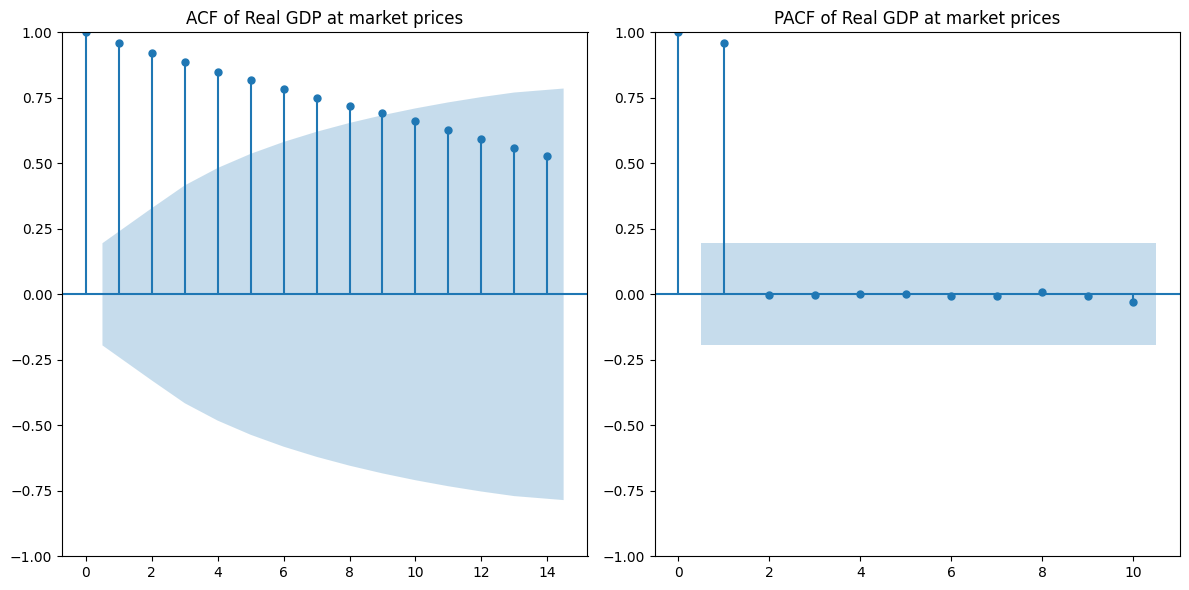

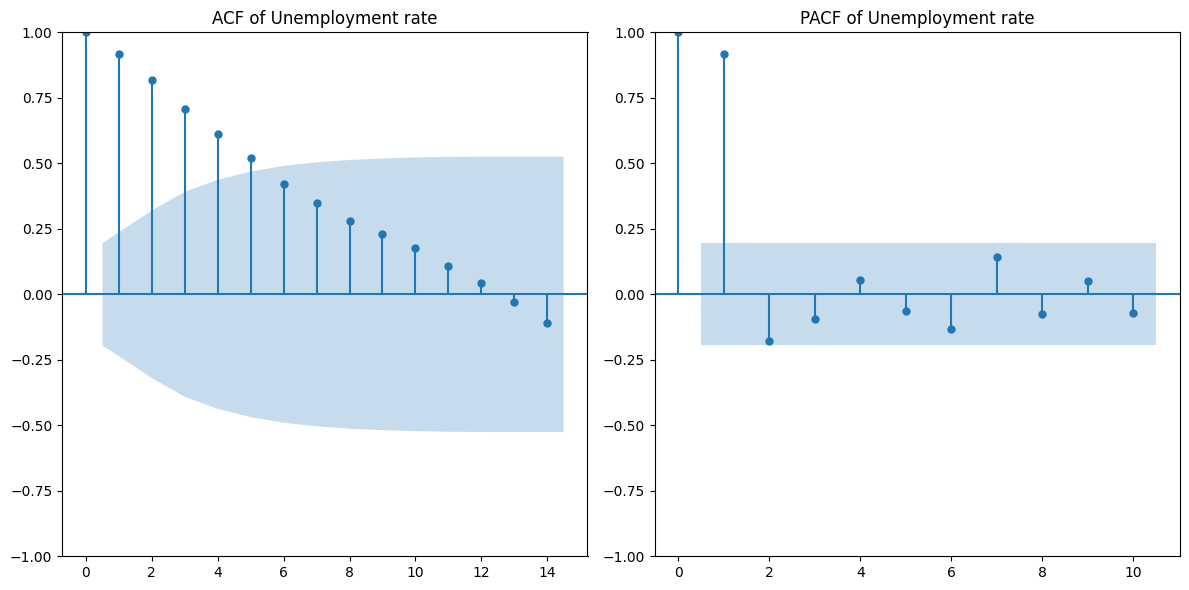

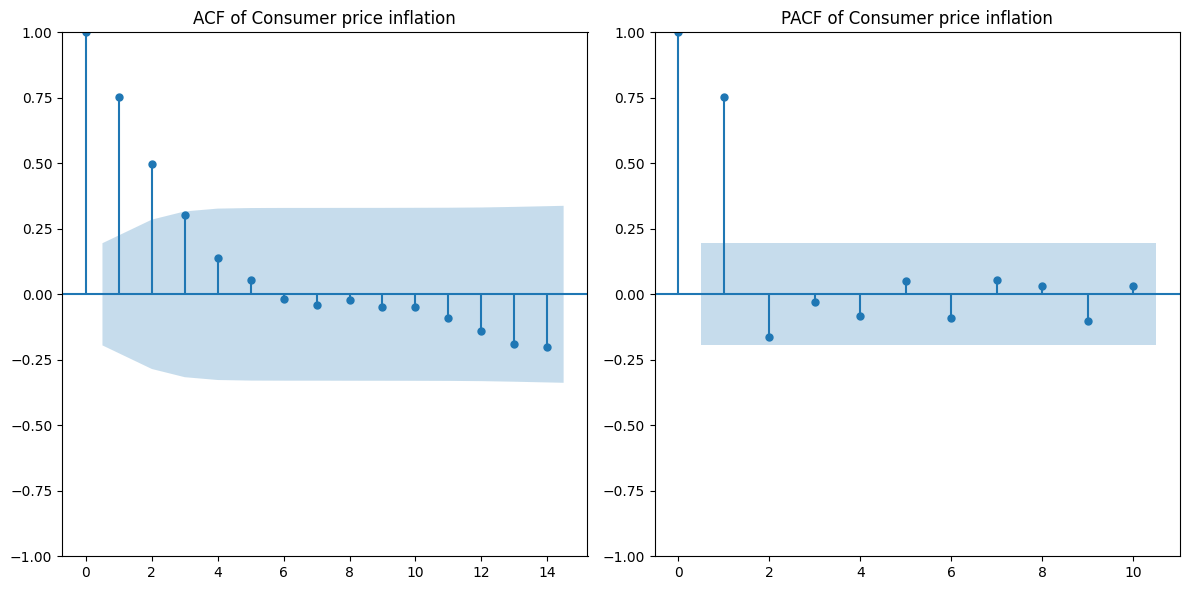

In [15]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for column in df.columns:
    plt.figure(figsize=(12, 6))
    
    # ACF plot
    plt.subplot(1, 2, 1)
    plot_acf(df[column], lags=14, ax=plt.gca())  # Adjust lags as needed
    plt.title(f"ACF of {column}")
    
    # PACF plot
    plt.subplot(1, 2, 2)
    plot_pacf(df[column], lags=10, ax=plt.gca())  # Adjust lags as needed
    plt.title(f"PACF of {column}")
    
    plt.tight_layout()
    plt.show()

Comment on the plots:
- For the real GDP at market prices: the ACF shows a very high autocorrelation with recent previous values and slowly decreasing towards the past. This slow decrease shows that there is a persistent trend on the values, which indicates this might be a non-stationary time series: this is very interesting since we saw from the unit root hypothesis on the original dataset that this variable was non-stationary. About the PACF: we know it is measuring the direct autocorrelation between the lagged metric and the one at stake. We see from the plot that the two most recent metrics play an important role, but for any datapoint older than that we see that the impact is minimal, if any.

- For the unemployment rate: the ACF shows high autocorrelation with recent previous values and even though it decreases faster towards the past in comparrisson to the real GDP at market prices, we can still see it as a slow decrease, sugesting a persistend trend and non-stationary time series. Another difference we can point out is that from lag 7 backwards, the impact is already statistically insignificant (inside the blue shaded area) whereas in the first ACF the first 13 lags were significant. The PACF is not much different from the last one too: the first lag still has great impact on the metric the other don't. Except for the second one which has a negative direct impact and is statistically significant.

- For the consumer price inflation: this ACF does not show soo much of a slow decay - showing we don't really have a strong persistent trend as strong as we had in the others: from the 4th lag backwards we have no statistically significant effect. The PACF is very close to the last one: the first lag has strong relevance on the actual value and the second lag has a somewhat significant negative direct effect on it.


Question 33: Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion.

The principle of parsimony, also know as Ockham's razor, is that we should give preference to simpler models: if two models have the same explanatory power and one of them is simpler - then we chose the simpler one. This increases interpretability, is more computationaly efficient and reduces overfitting. 
Now, the idea of information criterion is a way to ponderate the amount of errors commited and the complexity of the model. This is something we also did when prunning decision tress in Data Mining: we had to calculate something called the "Generalization Error" which took in consideration not only the amount of "Training Errors" bein commited, but also the amount of leaves (complexity) of out tree.

Question 34: Explain the problem of auto-correlation of the errors.

This happens when the residuals (errors) of a regression model are not independent of each other. So, an error at time t is correlated with errors that came before (t-1, t-2...)

Question 35: Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors.

In [16]:
import statsmodels.api as sm

df_stationary_35 = df_stationary[['Unemployment rate', 'Consumer price inflation']]
df_stationary_35 = sm.add_constant(df_stationary_35)

y = df_stationary['Real GDP at market prices']

model = sm.OLS(y, df_stationary_35).fit()

print(model.summary())

# Extract residuals
residuals = model.resid

# Perform Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)

print(f"Durbin-Watson Statistic: {dw_stat}")
if 1.5 < dw_stat < 2.5:
    print("No significant autocorrelation detected")
else:
    print("Autocorrelation detected")
    

                                OLS Regression Results                               
Dep. Variable:     Real GDP at market prices   R-squared:                       0.428
Model:                                   OLS   Adj. R-squared:                  0.413
Method:                        Least Squares   F-statistic:                     29.50
Date:                       Sat, 07 Dec 2024   Prob (F-statistic):           2.70e-10
Time:                               11:30:44   Log-Likelihood:                -916.08
No. Observations:                         82   AIC:                             1838.
Df Residuals:                             79   BIC:                             1845.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

Question 36: Regardless of your answer to question 35, correct auto-correlation with GLS. Test again for the presence of auto-correlation. Comment on your results.

In [17]:
import numpy as np

X = df_stationary[['Unemployment rate', 'Consumer price inflation']]
X = sm.add_constant(X)
y = df_stationary['Real GDP at market prices']
ols_model = sm.OLS(y, X).fit()
residuals = ols_model.resid

# Step 2: Test for autocorrelation using Durbin-Watson
dw_stat_ols = durbin_watson(residuals)
print(f"Durbin-Watson statistic (OLS): {dw_stat_ols}")

# Step 3: Estimate rho (first-order autocorrelation coefficient)
rho = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
print(f"Estimated rho: {rho}")

# Step 4: Transform the variables
y_trans = y[1:] - rho * y[:-1].values
X_trans = X[1:] - rho * X[:-1].values

# Step 5: Fit the GLS model to the transformed variables
gls_model = sm.OLS(y_trans, X_trans).fit()  # GLS manually transformed
print(gls_model.summary())

dw_stat_gls = durbin_watson(gls_model.resid)
print(f"Durbin-Watson statistic (GLS): {dw_stat_gls}")
if 1.5 < dw_stat_gls < 2.5:
    print("No significant autocorrelation detected")
else:
    print("Autocorrelation detected")


Durbin-Watson statistic (OLS): 0.46786065398272136
Estimated rho: 0.7660261170719552
                                OLS Regression Results                               
Dep. Variable:     Real GDP at market prices   R-squared:                       0.391
Model:                                   OLS   Adj. R-squared:                  0.376
Method:                        Least Squares   F-statistic:                     25.08
Date:                       Sat, 07 Dec 2024   Prob (F-statistic):           3.89e-09
Time:                               11:30:44   Log-Likelihood:                -867.47
No. Observations:                         81   AIC:                             1741.
Df Residuals:                             78   BIC:                             1748.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                               coef    std err         

Question 37: For all variables, construct their lag 1 and lag 2 variables.


Question 38: Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why?

In [18]:
# Assume df contains your original dataset with time series variables
df_lagged = df.copy()

# Create lag 1 and lag 2 variables for each column
for col in df.columns:
    df_lagged[f"{col}_lag1"] = df[col].shift(1)  # Lag 1
    df_lagged[f"{col}_lag2"] = df[col].shift(2)  # Lag 2

df_lagged = df_lagged.dropna()

y = df_lagged[['Real GDP at market prices']]

df_lagged = df_lagged.drop(['Real GDP at market prices', 'Unemployment rate','Consumer price inflation'
                            ,'Real GDP at market prices_lag1','Real GDP at market prices_lag2'], axis=1)
df_lagged = sm.add_constant(df_lagged)

ols_model = sm.OLS(y, df_lagged).fit()
residuals = ols_model.resid

print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     Real GDP at market prices   R-squared:                       0.428
Model:                                   OLS   Adj. R-squared:                  0.413
Method:                        Least Squares   F-statistic:                     29.50
Date:                       Sat, 07 Dec 2024   Prob (F-statistic):           2.70e-10
Time:                               11:30:44   Log-Likelihood:                -916.08
No. Observations:                         82   AIC:                             1838.
Df Residuals:                             79   BIC:                             1845.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [19]:
print('Datapoints in the dataframe: ', len(df))
print('Datapoints in the dataframe: ', len(df_lagged))

Datapoints in the dataframe:  101
Datapoints in the dataframe:  99


We lost two data points because when we introduce 2 lags, we end up with 2 rows (in the beggining) with missing values. And because we end up droping these rows to run the OLS, we have minus 2 rows (datapoints) to work with.

Question 39: State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level.

In [20]:
from statsmodels.tsa.stattools import grangercausalitytests

print(df_stationary)

# Prepare the dataset for Granger causality test
data = df[['Real GDP at market prices', 'Unemployment rate']]

max_lags = 2
grangercausalitytests(data, max_lags, verbose=True)


     Real GDP at market prices  Unemployment rate  Consumer price inflation
249               -5157.680634           1.612217                 -3.086901
250                 -18.483568           0.651997                 -5.490429
251                2719.669370          -0.436035                 -2.536247
252               10797.984003          -1.008674                 -4.018009
253               14098.371607          -1.592062                 -1.757828
..                         ...                ...                       ...
326               22757.350000           1.520039                 -3.135754
327               57504.700000          -0.407737                 -1.925612
328               60572.900000          -1.798289                 -0.151469
329               42989.400000          -1.951712                  2.085806
330                1475.700000          -0.164321                  3.363665

[82 rows x 3 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:  

C:\Users\guik2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (2.8017753603380493, 0.09738179330400402, 97.0, 1),
   'ssr_chi2test': (2.8884282065340714, 0.08921792783709236, 1),
   'lrtest': (2.8474993837553484, 0.09151618006001695, 1),
   'params_ftest': (2.80177536033779, 0.09738179330401998, 97.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.609207646257333, 0.07891719959026688, 94.0, 2),
   'ssr_chi2test': (5.495990574031404, 0.06405614676502568, 2),
   'lrtest': (5.348856429337957, 0.06894623957463936, 2),
   'params_ftest': (2.6092076462573397, 0.07891719959026612, 94.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

We see that both p-values are higher that the 1% level -- which means there is no evidence that unemployment Granger-causes GDP for lags 1 and 2.

Question 40: Divide the sample in two groups: 1900-1960 and 1961-2000. Test the stability of coefficients between the two periods.